<a href="https://colab.research.google.com/github/ValeriiYermak/DataScience/blob/main/HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import LeakyReLU

In [21]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [22]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [24]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=256,
                    callbacks=[early_stopping])

Epoch 1/50
235/235 [==============================] - 5s 15ms/step - loss: 1.3502 - accuracy: 0.5460 - val_loss: 0.7076 - val_accuracy: 0.7559
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.7428 - accuracy: 0.7442 - val_loss: 0.5629 - val_accuracy: 0.8055
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6133 - accuracy: 0.7887 - val_loss: 0.5088 - val_accuracy: 0.8231
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.5535 - accuracy: 0.8089 - val_loss: 0.4756 - val_accuracy: 0.8341
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.5143 - accuracy: 0.8217 - val_loss: 0.4540 - val_accuracy: 0.8403
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.4833 - accuracy: 0.8306 - val_loss: 0.4353 - val_accuracy: 0.8452
Epoch 7/50
235/235 [==============================] - 5s 19ms/step - loss: 0.4620 - accuracy: 0.8365 - val_loss: 0.4215 - val_accuracy: 0.8494

In [26]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3121 - accuracy: 0.8926
Test accuracy: 0.8925999999046326


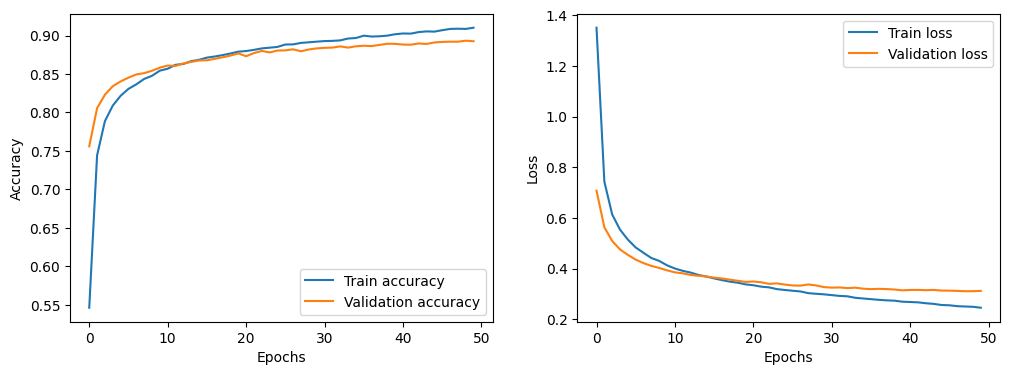

In [27]:

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


** ВИСНОВКИ**

1. Після проведення великої кількості підборів для оптимізації роботи моделі можу сказати наступне:

- модель перестала навчатися.
- в процесі підбору змінювалися кількість шарів, кількість нейронів, активаційна функція, вносилися функції штрафування L2 і, застосовувалися функції ранньої зупинки навчальної моделі, але результат не досяг бажаного - 91% точності.

- на різних єтапах були моменти збільшення точності до 90%, але вони були разові при значному зростанні функції втрат. Тому вважаю дану модель не ефективною.

- зміна оптимізатора на RMSprop або SGD не принесла бажаного результату, крім того ще зменшила точність та збільшила функцію втрат.

- Використання data augmentation також не допомогла покращити узагальнюючу здатність моделі.

- Станом на закінчення дослідження вважаю дану модель максимально роботоздатною та ефективною. Модель має точність 0.8925 та втрати в межах 31%